In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv(r'C:\Users\haifa\Albayrak Internship\Projects\Regression Tests\data.csv', header =None)

## 1- Describe Data

In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       303 non-null    int64  
 1   1       303 non-null    int64  
 2   2       303 non-null    int64  
 3   3       303 non-null    int64  
 4   4       303 non-null    int64  
 5   5       303 non-null    int64  
 6   6       303 non-null    int64  
 7   7       303 non-null    int64  
 8   8       303 non-null    int64  
 9   9       303 non-null    float64
 10  10      303 non-null    int64  
 11  11      303 non-null    object 
 12  12      303 non-null    object 
 13  13      303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [5]:
df.columns = ['age',
              'sex',
              'cp',
              'trestbps',
              'chol',
              'fbs',
              'restecg',
              'thalach',
              'exang',
              'oldpeak',
              'slope',
              'ca',
              'thal',
              'num',]
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca           object
thal         object
num           int64
dtype: object

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [9]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
302,38,1,3,138,175,0,0,173,0,0.0,1,?,3,0


## 2- Missing Data

In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

<Axes: >

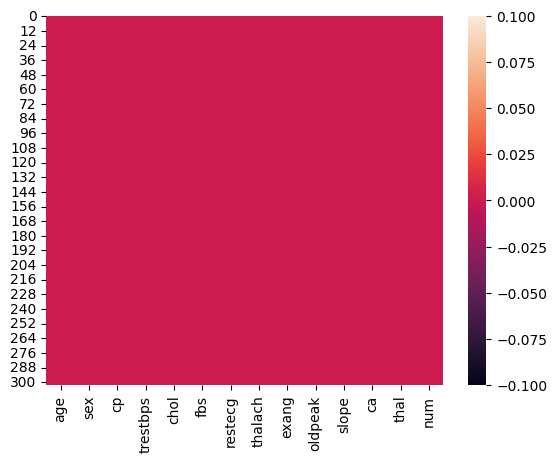

In [11]:
sns.heatmap(df.isnull())

In [12]:
df['ca'].unique()

array(['0', '3', '2', '1', '?'], dtype=object)

In [13]:
df['ca'].value_counts()

ca
0    176
1     65
2     38
3     20
?      4
Name: count, dtype: int64

In [14]:
df['thal'].unique()

array(['6', '3', '7', '?'], dtype=object)

In [15]:
df['thal'].value_counts()

thal
3    166
7    117
6     18
?      2
Name: count, dtype: int64

## 3- Cleaning and Dealing with Missing Data

In [16]:
len(df.loc[(df['ca'] == '?')])

4

In [17]:
len(df.loc[(df['thal'] == '?')])

2

In [18]:
df.loc[(df['ca'] == '?') | (df['thal'] == '?')]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53,0,3,128,216,0,2,115,0,0.0,1,0,?,0
166,52,1,3,138,223,0,0,169,0,0.0,1,?,3,0
192,43,1,4,132,247,1,2,143,1,0.1,2,?,7,1
266,52,1,4,128,204,1,0,156,1,1.0,2,0,?,2
287,58,1,2,125,220,0,0,144,0,0.4,2,?,7,0
302,38,1,3,138,175,0,0,173,0,0.0,1,?,3,0


So here we have 6 of 303 rows, %2, contain missing value

In [19]:
dfNew = df.loc[(df['ca'] != '?') & (df['thal'] != '?')]

In [20]:
len(dfNew)

297

In [21]:
dfNew

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3


## 4- Transform Data

In [22]:
dfNew['ca'].unique()

array(['0', '3', '2', '1'], dtype=object)

In [23]:
dfNew['thal'].unique()

array(['6', '3', '7'], dtype=object)

In [24]:
dfNew['ca'] = dfNew['ca'].astype(float)
dfNew['thal'] = dfNew['thal'].astype(float)
print(dfNew.dtypes)
dfNew.fillna(dfNew.mean(), inplace=True)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
dtype: object


C:\Users\haifa\AppData\Local\Temp\ipykernel_20996\1233315011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNew['ca'] = dfNew['ca'].astype(float)
C:\Users\haifa\AppData\Local\Temp\ipykernel_20996\1233315011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNew['thal'] = dfNew['thal'].astype(float)
C:\Users\haifa\AppData\Local\Temp\ipykernel_20996\1233315011.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

In [25]:
dfNew['num'].value_counts()

num
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64

In [26]:
dfNew.num =dfNew.num.replace([1,2,3,4],1)   

C:\Users\haifa\AppData\Local\Temp\ipykernel_20996\1133667411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNew.num =dfNew.num.replace([1,2,3,4],1)


In [27]:
dfNew['num'].value_counts()

num
0    160
1    137
Name: count, dtype: int64

## 5- Data Analysis

In [28]:
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  num       297 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.8 KB


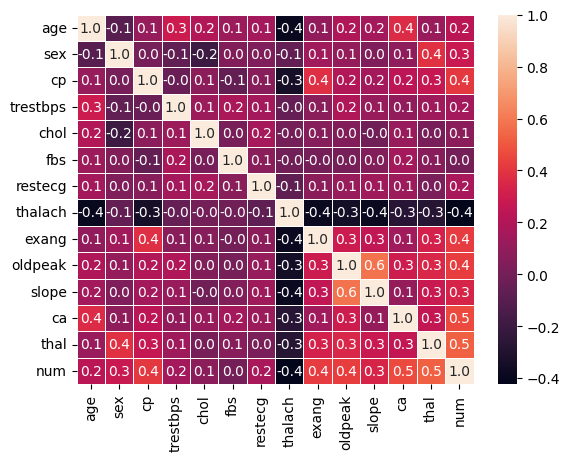

In [29]:
sns.heatmap(dfNew.corr(), annot=True, fmt ='.1f',linewidth= .5)
plt.show()

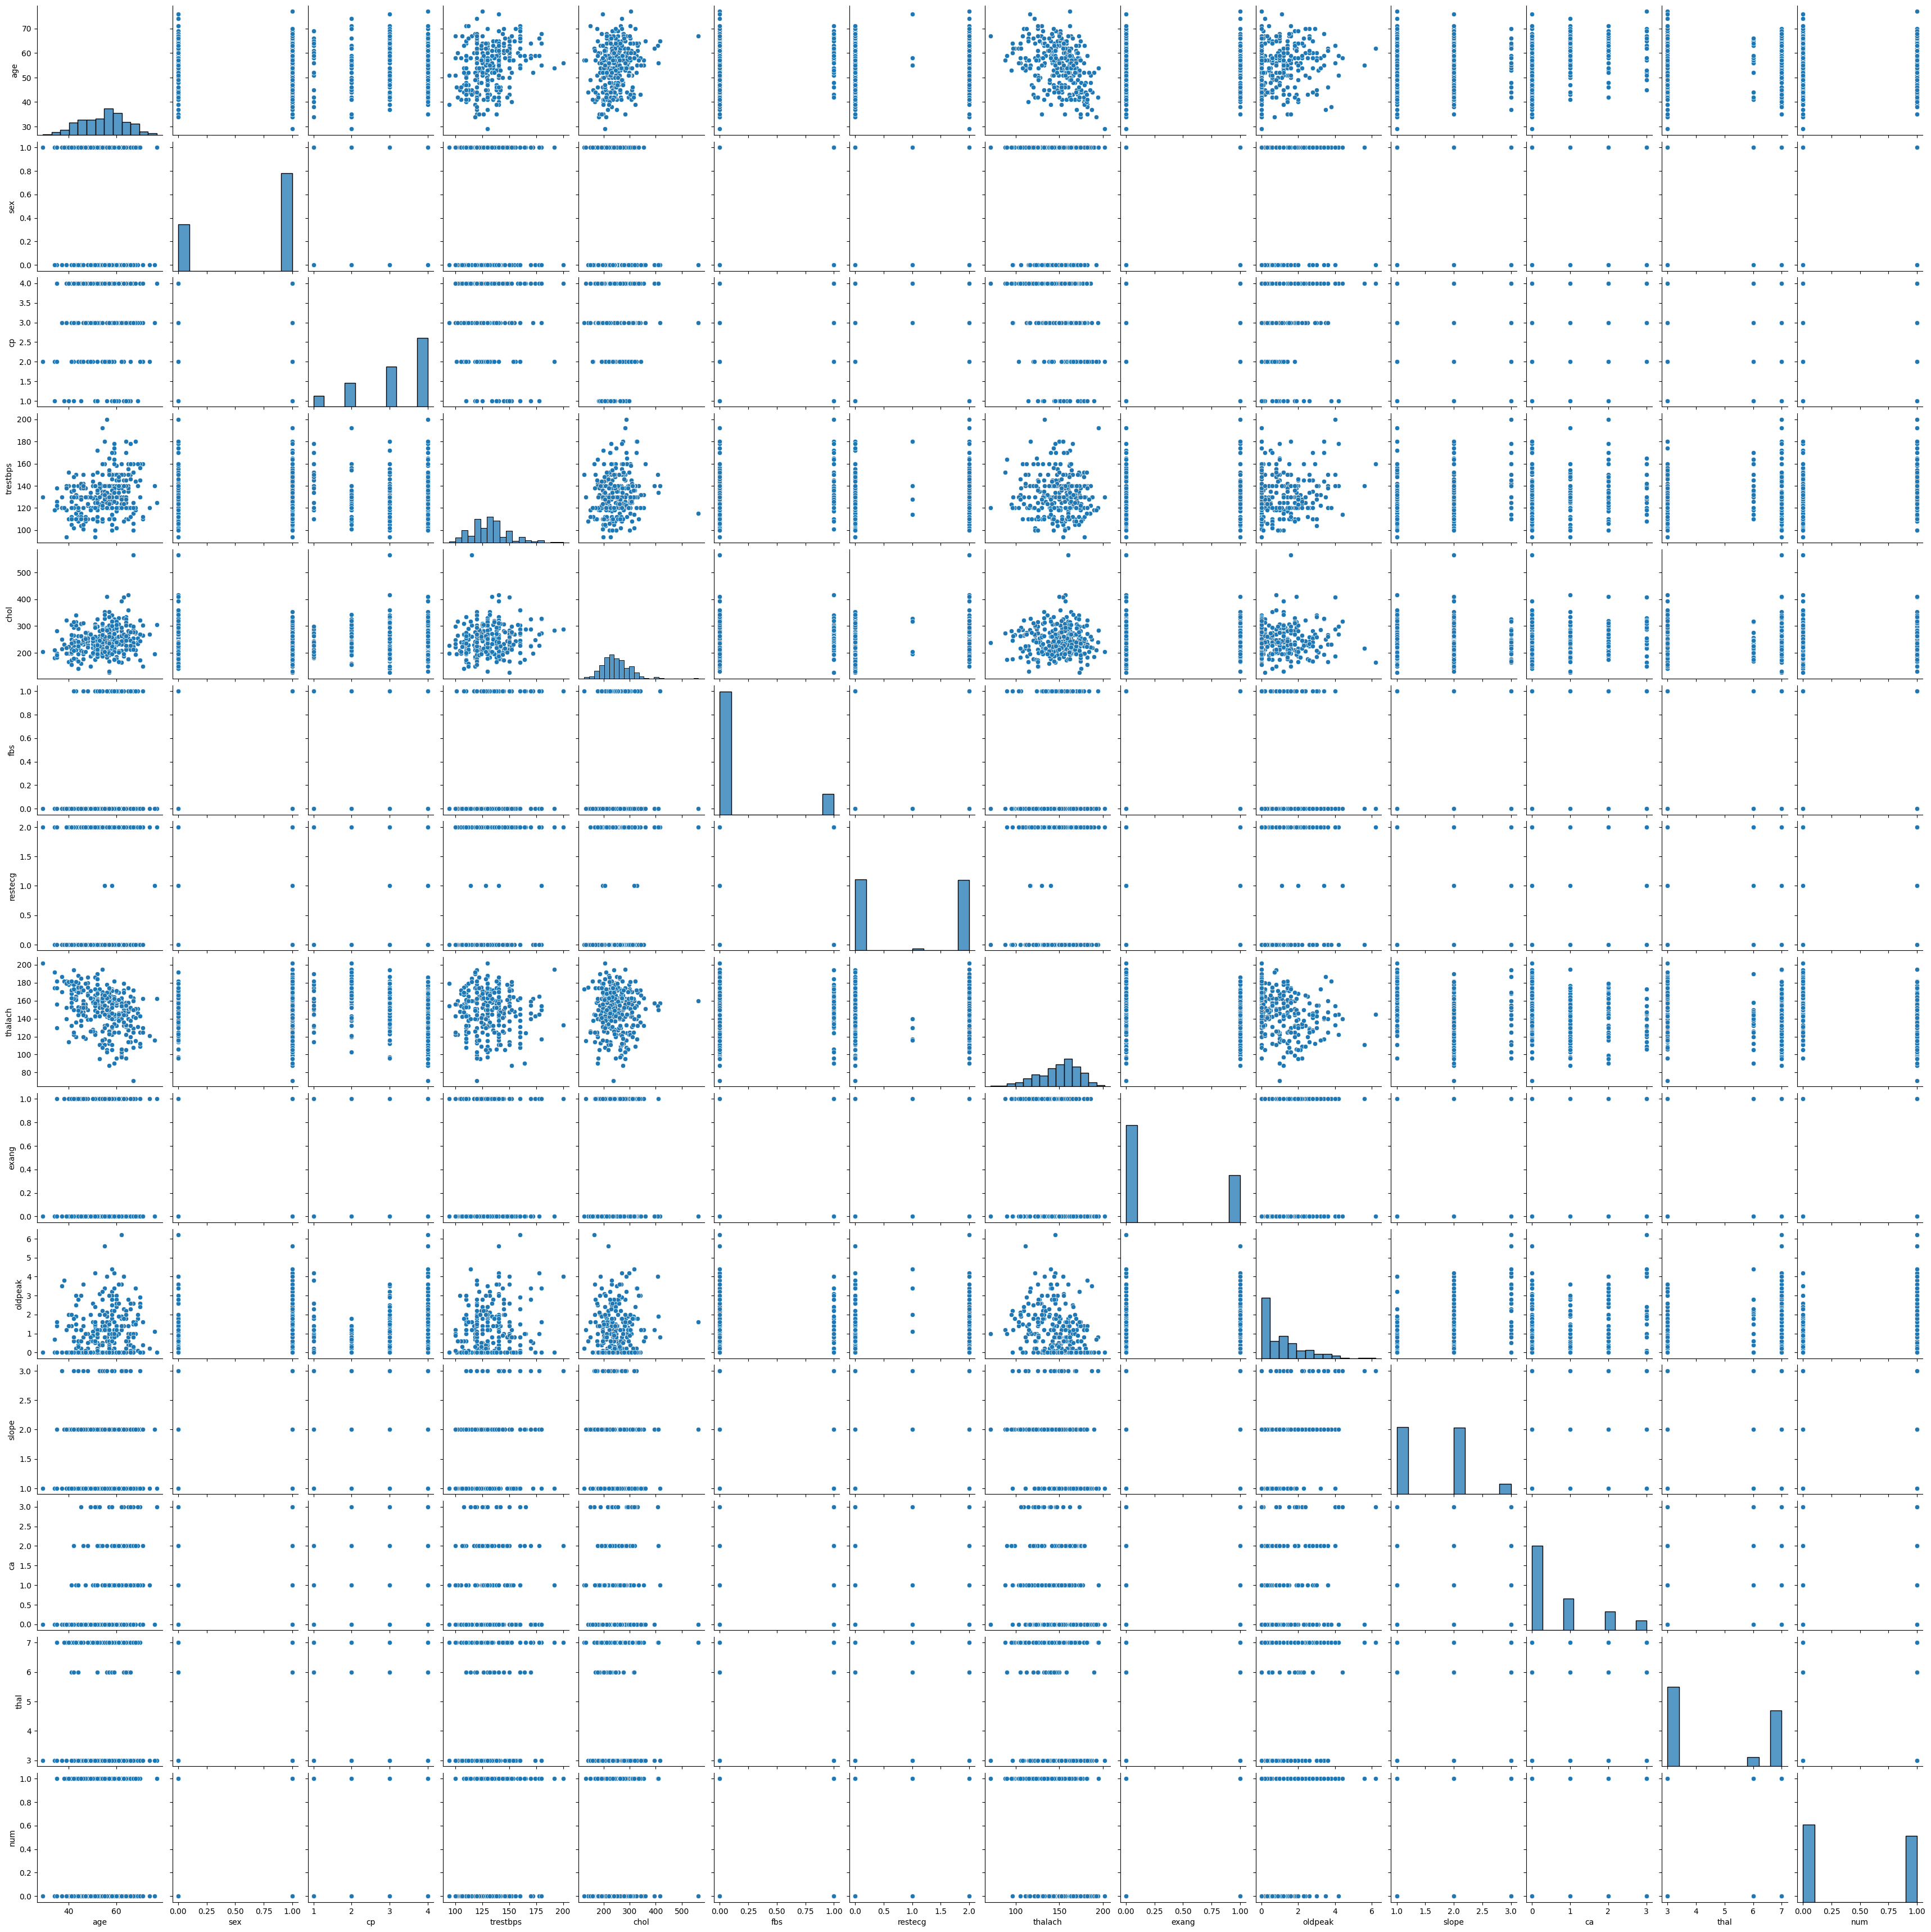

In [30]:
sns.pairplot(data= dfNew)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>],
       [<Axes: title={'center': 'trestbps'}>,
        <Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>],
       [<Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>,
        <Axes: title={'center': 'exang'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'num'}>, <Axes: >]], dtype=object)

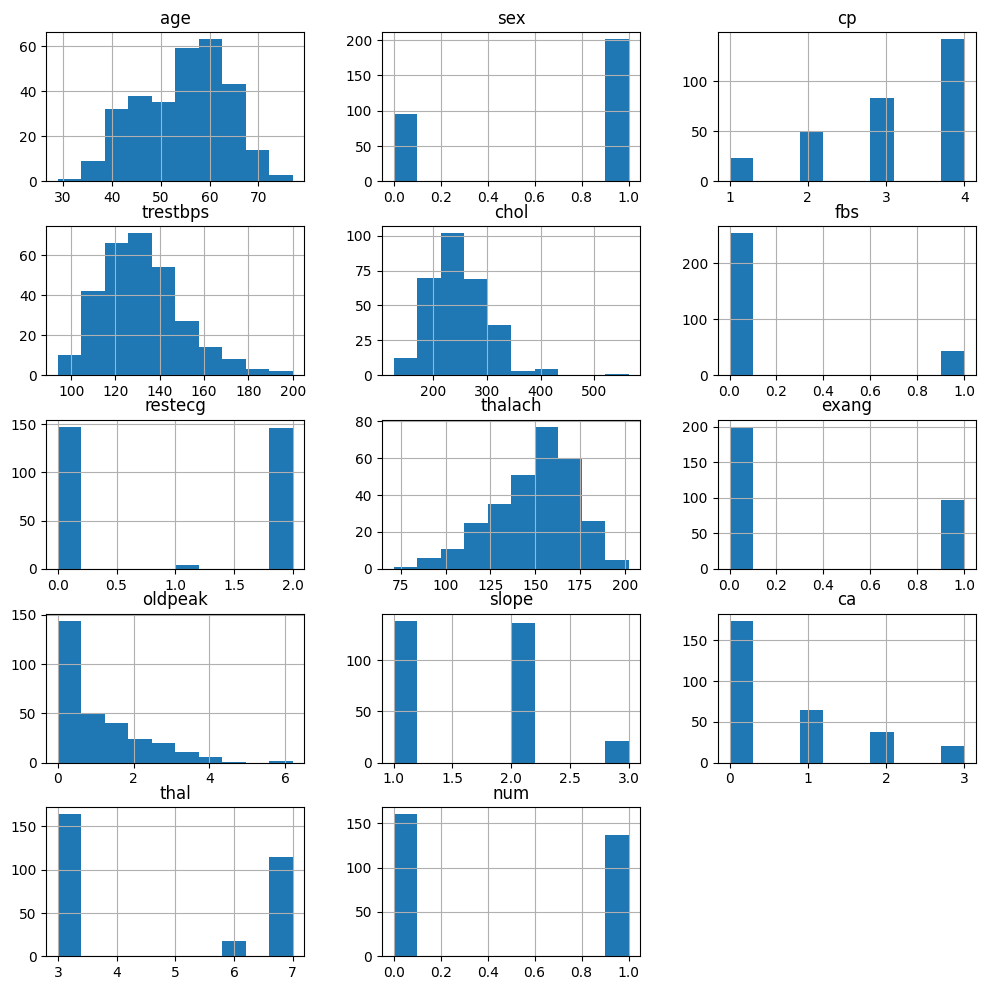

In [31]:
dfNew.hist(figsize=(12,12),layout=(5,3))

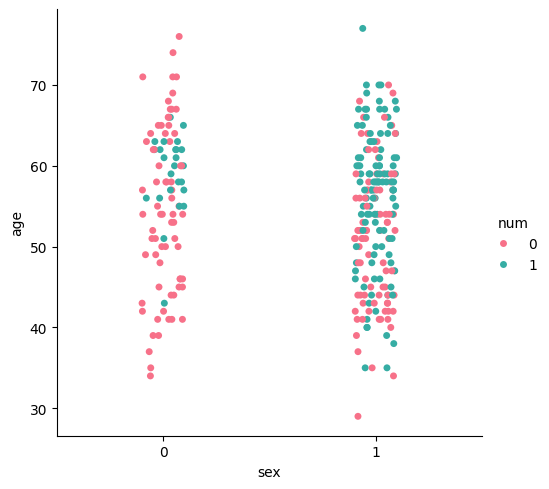

In [32]:
sns.catplot(x='sex',y='age', hue='num', data=dfNew, palette='husl')

<Axes: xlabel='sex', ylabel='chol'>

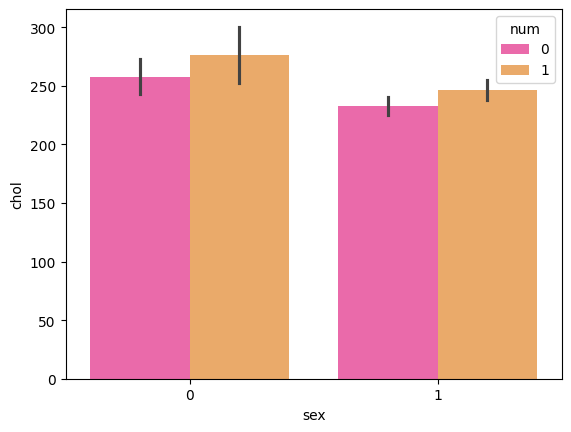

In [33]:
sns.barplot(x='sex',y='chol', hue= 'num' ,data=dfNew, palette='spring')

In [34]:
dfNew['sex'].value_counts()

sex
1    201
0     96
Name: count, dtype: int64

We have 201 Male and 96 Female

In [35]:
dfNew['num'].value_counts()

num
0    160
1    137
Name: count, dtype: int64

We have 137 cases of heart diseases

<Axes: xlabel='ca', ylabel='count'>

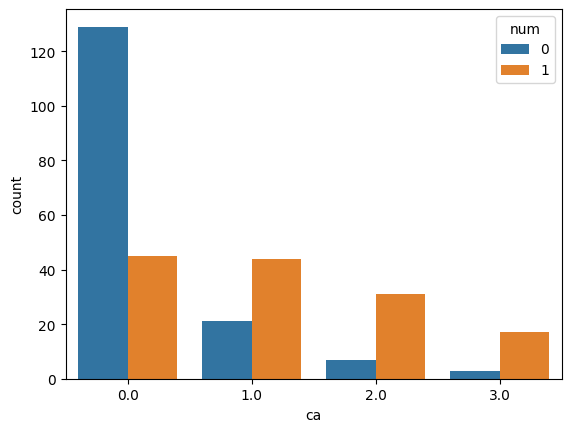

In [36]:
sns.countplot(x='ca',hue='num', data=dfNew)

## 6- Create Model

In [37]:
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  num       297 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.8 KB


In [38]:
x = dfNew.drop(['num'],axis =1)
y = dfNew.num

In [39]:
x_Train, x_Test, y_Train, y_Test = train_test_split(x,y,train_size=.2, random_state =42)

In [40]:
accuracies =[]

In [41]:
def all(model):
    model.fit(x_Train, y_Train)
    y_pred = model.predict(x_Test)
    mse = mean_squared_error(y_Test, y_pred)
    r2 = r2_score(y_Test, y_pred)
    print(f'Model: {model.__class__.__name__}')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')
    accuracies.append(r2)

In [42]:
# Linear Regression
model1 = LinearRegression()
all(model1)

Model: LinearRegression
Mean Squared Error: 0.16637626840321207
R-squared: 0.33430689076558984


R-squared is a measure of how well the regression model fits the observed data , coefficient of determination, or R2 , is a measure that provides information about the goodness of fit of a model

MSE measures the average squared difference between the actual values and the predicted values, MSE is a common metric to evaluate the accuracy of regression models. It quantifies the model's prediction errors.

Linear regression and multiple linear regression are same beacause as we are using all features

In [43]:
# Multiple Linear Regression
model2 = LinearRegression()
all(model2)

Model: LinearRegression
Mean Squared Error: 0.16637626840321207
R-squared: 0.33430689076558984


In [44]:
# Polynomial Linear Regression
poly_features = PolynomialFeatures(degree=2)
x_Train_poly = poly_features.fit_transform(x_Train)
x_Test_poly = poly_features.transform(x_Test)
poly_model = LinearRegression()
poly_model.fit(x_Train_poly, y_Train)
y_pred_poly = poly_model.predict(x_Test_poly)
mse_poly = mean_squared_error(y_Test, y_pred_poly)
r2_poly = r2_score(y_Test, y_pred_poly)
print('Polynomial Regression MSE:', mean_squared_error(y_Test, y_pred_poly))
print(f'R-squared: {r2_poly}')
accuracies.append(r2_poly)

Polynomial Regression MSE: 2.1600606403723774
R-squared: -7.642683825192693


In [45]:
# Decision Tree Regression
model4= DecisionTreeRegressor(random_state=42)
all(model4)

Model: DecisionTreeRegressor
Mean Squared Error: 0.2689075630252101
R-squared: -0.07593416684325782


In [46]:
# Random Forest Regression
model5 = RandomForestRegressor(n_estimators=100, random_state=42)
all(model5)

Model: RandomForestRegressor
Mean Squared Error: 0.1982861344537815
R-squared: 0.20663136257681713


n_estimators=100 is number of trees , Increasing the number of trees generally improves the model's performance up to a certain point

random_state=42: This parameter ensures reproducibility of results. Setting random_state to a fixed value (42 in this case) ensures that the random splits in the data and the randomness in the algorithm's behavior remain consistent across different runs

In [47]:
# Gradient Boosting Regression
model6 = GradientBoostingRegressor(n_estimators=100, random_state=42)
all(model6)

Model: GradientBoostingRegressor
Mean Squared Error: 0.22116405249109533
R-squared: 0.11509383419470198


In [48]:
# XGBoost Regression
model7= XGBRegressor(n_estimators=100, random_state=42)
all(model7)

Model: XGBRegressor
Mean Squared Error: 0.23279985785484314
R-squared: 0.06853741407394409


In [49]:
algorithms =['Linear Regression', 'Multiple Linear Regression', 'Polynomial Linear Regression', 'Decision Tree Regression',
            'Random Forest Regressionr', 'Gradient Boosting Regression', 'XGBoost Regression']

In [50]:
new = pd.DataFrame({'algorithms' : algorithms , 'R-squared' : accuracies})

In [51]:
new

,algorithms,R-squared
0,Linear Regression,0.334307
1,Multiple Linear Regression,0.334307
2,Polynomial Linear Regression,-7.642684
3,Decision Tree Regression,-0.075934
4,Random Forest Regressionr,0.206631
5,Gradient Boosting Regression,0.115094
6,XGBoost Regression,0.068537


- Based on the R-squared values provided, Linear Regression and Multiple Linear Regression appear to perform the best among the models listed. They both have the highest R-squared value of approximately 0.334

In [52]:
modelF= LinearRegression()
modelF.fit(x_Train, y_Train) 

LinearRegression()

In [53]:
y_pred = modelF.predict(x_Test)

In [54]:
mse = mean_squared_error(y_Test, y_pred)
r2 = r2_score(y_Test, y_pred)

In [55]:
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 0.16637626840321207
R-squared: 0.33430689076558984
